# Predicting Likelihood of Having Heart Disease
# Gideon Oyedokun

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pandas_profiling import ProfileReport

In [2]:
db = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")

## General overview of the dataset

In [3]:
profile = ProfileReport(db, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Performing Simple EDA on the dataset

In [4]:
import seaborn as sns

In [5]:
# Checking the first five rows of the dataset
db.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [6]:
# Checking the last five rows of the dataset
db.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


In [7]:
# Checking the shape of the dataset
db.shape

(1190, 12)

In [8]:
# Checking the uniqe values for the dataset columns
db.nunique()

age                     50
sex                      2
chest pain type          4
resting bp s            67
cholesterol            222
fasting blood sugar      2
resting ecg              3
max heart rate         119
exercise angina          2
oldpeak                 53
ST slope                 4
target                   2
dtype: int64

### Cleaning the data

In [9]:
# Checking for the null values
db.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

### Removing Duplicates in the dataset

In [10]:
db.drop_duplicates()
db.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


### Relationship Analysis

<AxesSubplot:>

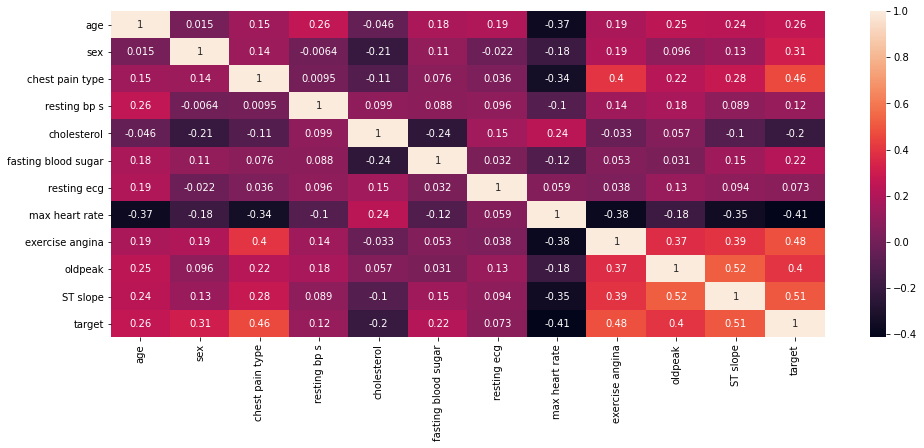

In [11]:
corelation = db.corr()
plt.figure(figsize=(16, 6))
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

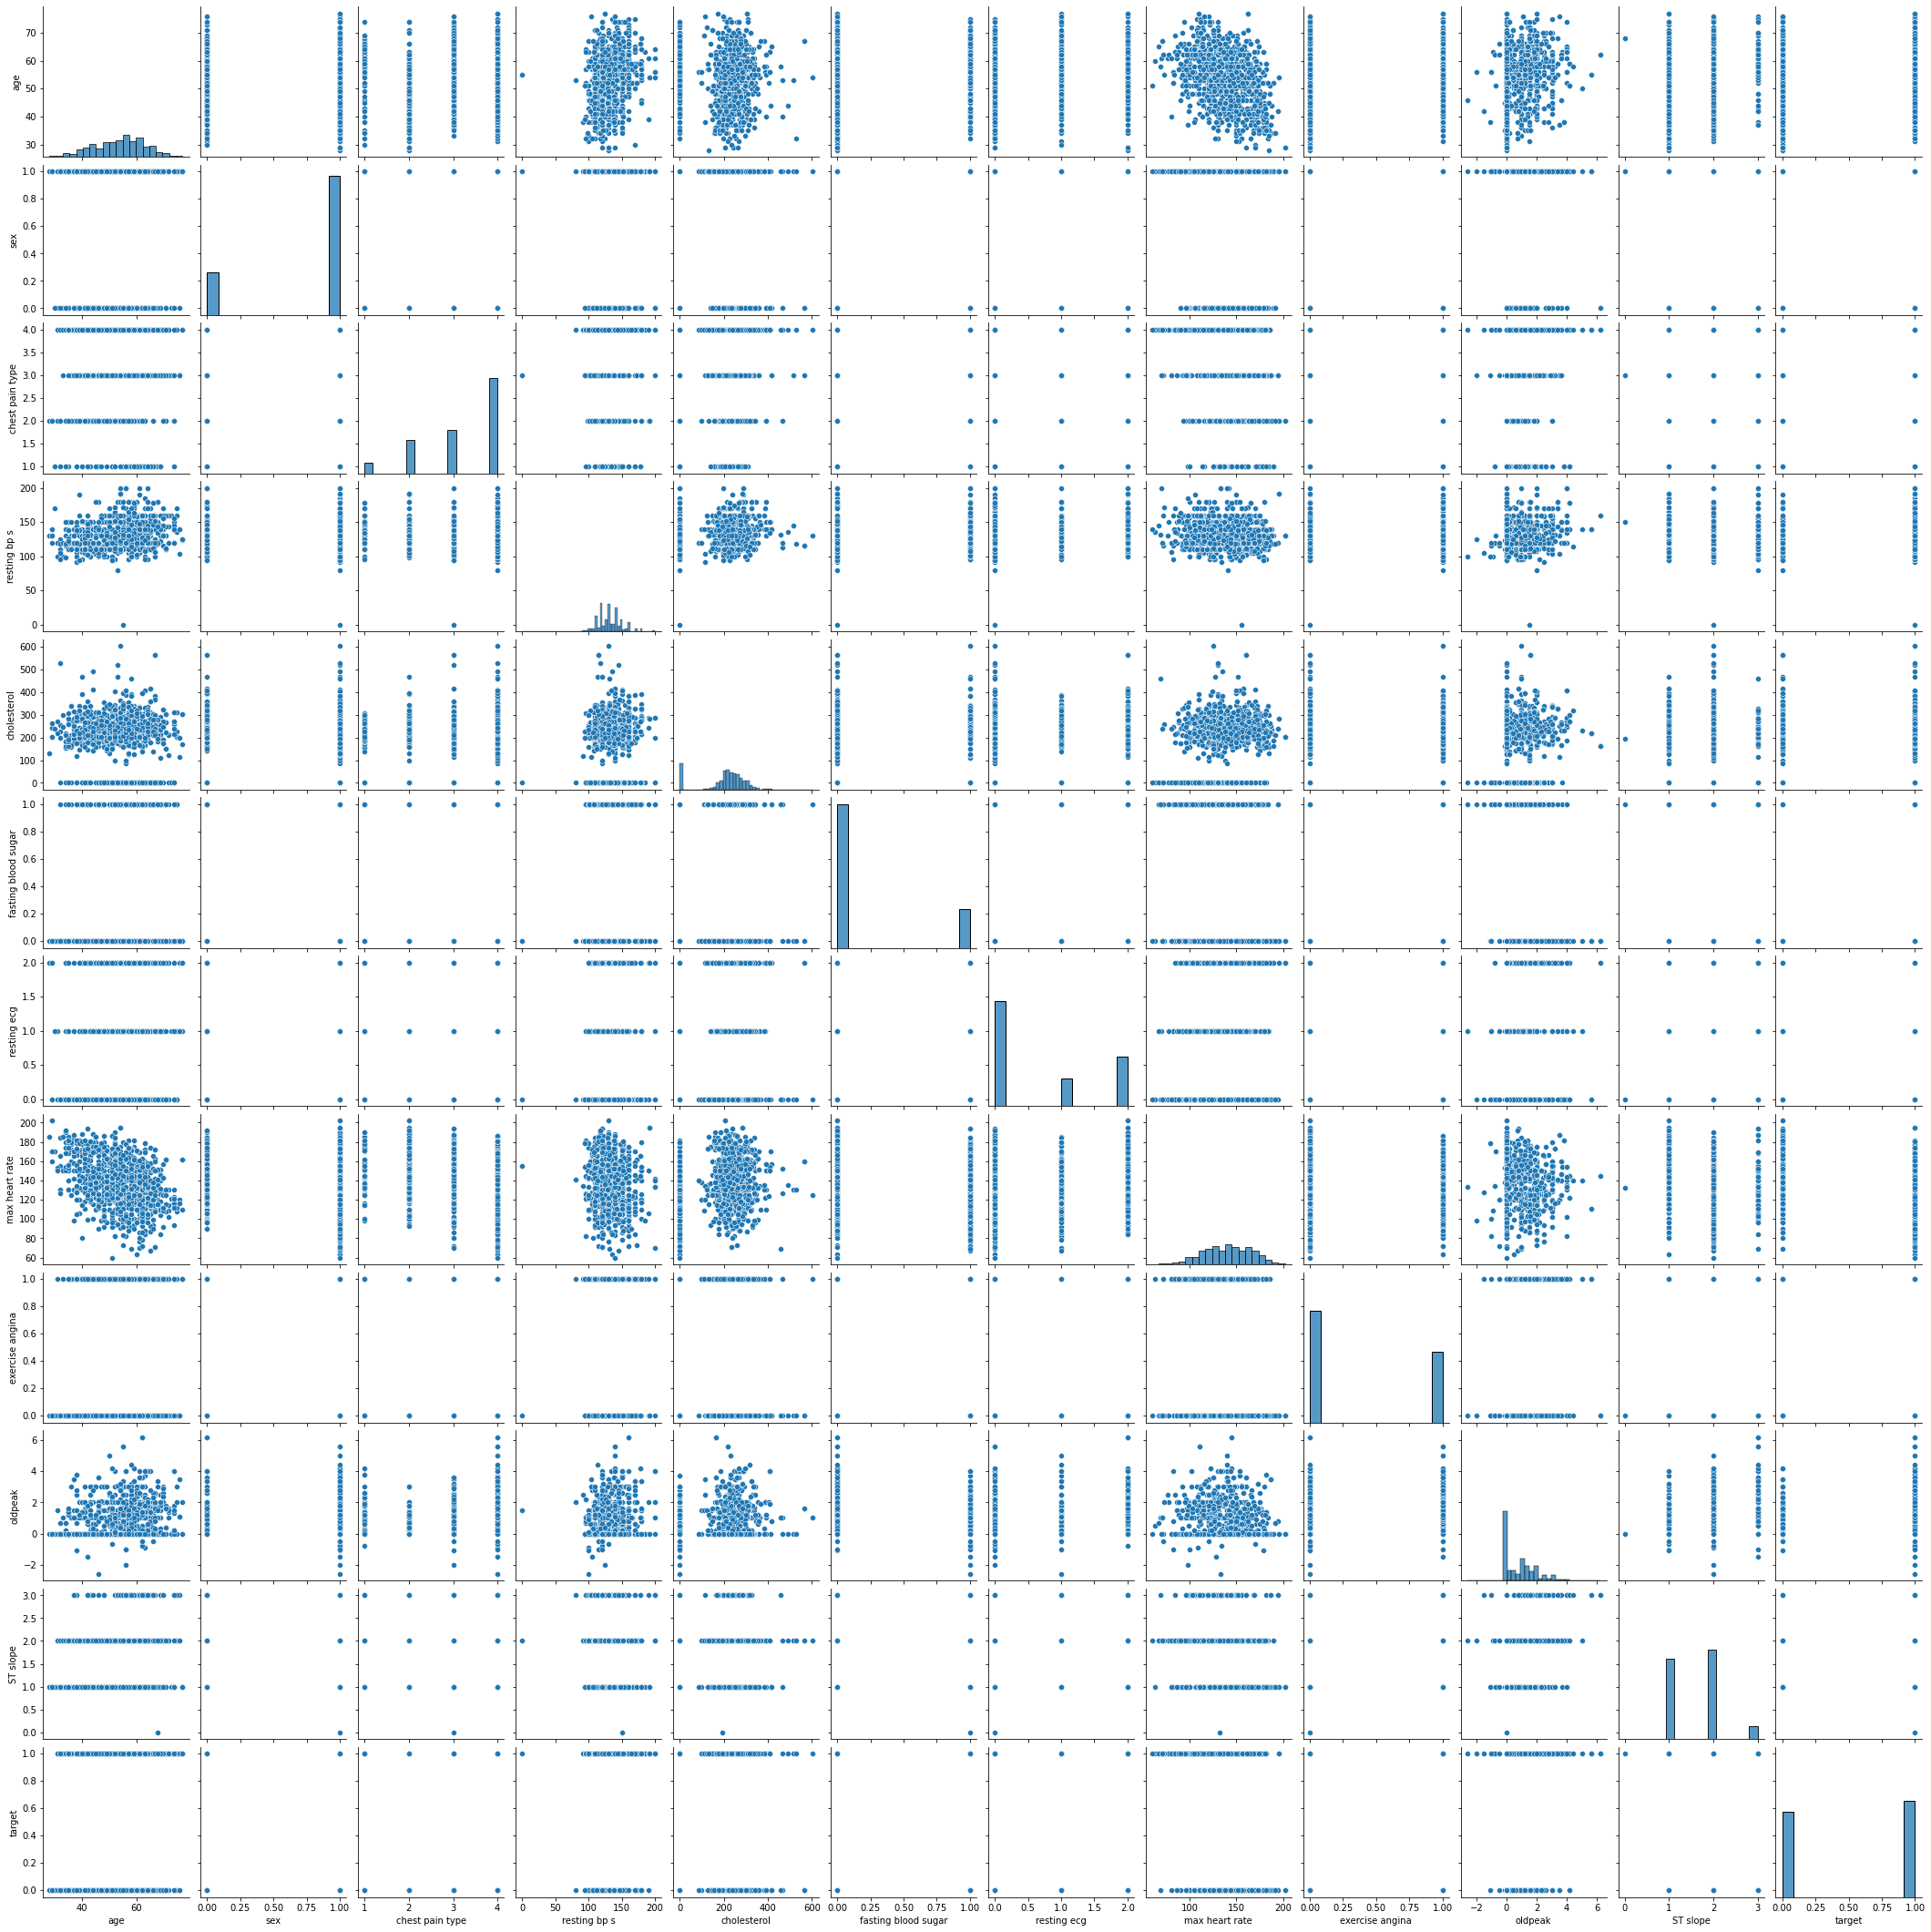

In [12]:
# Looking at the relationship between each vairable
sns.pairplot(db)
plt.savefig('saving-a-high-resolution-seaborn-plot.png', dpi=300)

# Getting Useful Vairables

>- age,
>- oldpeak,
>- chest_pain_type,
>- exercise_angina,
>- max_heart_rate,
>- ST_slope,
>- sex,
>- resting_ecg

##### For Neural Net work
>- resting_bp_s

<p>"It is found that feature set consisting of 10 attributes, thal, cp, ca, oldpeak, exang, thalach, slope, age, sex, restecg are recommended as relevant feature set(please refer Table 6-feature consisting of 10 attributes are given in bold) for further research. In our further work, it is proposed to use the recommended feature set to study the impact of big data techniques and technologies in enhancing the accuracy of classifiers"(Chellammal, 2019). Following the work done by the stidents of Bharathidasan University, I've narrowed down the attributes to the one's listed above in hopes of improving model accuracy while removing any unnessary data.</p>



(Chellammal, S., &amp; Sharmila, R. (2019). International Journal of Recent Technology and Engineering (IJRTE). Recommendation of Attributes for Heart Disease Prediction Using Correlation Measure, 8(2S3), 870–875. https://doi.org/10.35940/ijrte.2277-3878 )

## Understanding the AGE vairable 

In [13]:
db['age'].describe()

count    1190.000000
mean       53.720168
std         9.358203
min        28.000000
25%        47.000000
50%        54.000000
75%        60.000000
max        77.000000
Name: age, dtype: float64

#### Based on research done with age and CVD, it is clear that the older an individual get, the more liekly they are to suffer from Heart Disease. Age is directly linnked with weakking body tissues, which inturnes affects the mussles of the heart and the way it pumps. Also related to age is a symptom klnow as arrhythmia - irregular beating patterns in the heart. It has been seen that as one ages, the eletrical signals that contract the heart muscells weaken; therfore, reducing the fuction of the heart altogether. Typically these chages can be seen as individuals get to their sixties.

#### So, understanding this fact, it was clear that we should look at the dataset and see just how difuesed the age is and to see how many people in the dataset are at, or above the age 60.

In [15]:
count = 0
base_age = 60
for person in db['age']:
    if person >= base_age:
        count +=1
        
print(F"There are {count} people who are of the age {base_age} years, or older in the dataset.")
print(F"Meaning that out of the {db['age'].count()} people, {db['age'].count() - count} are younger than {base_age}.")

There are 337 people who are of the age 60 years, or older in the dataset.
Meaning that out of the 1190 people, 853 are younger than 60.


### Note: sex is binary where 1 = Male; 0 = Female
### Note: target is binary where 1 = heart Disease; 0 = normal

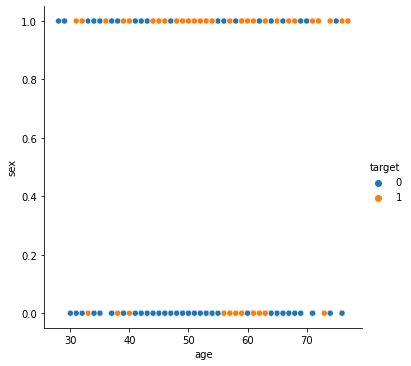

In [16]:
## Looking at the relationship with age and the target for both male and female
sns.relplot(x='age', y='sex', hue='target', data=db)

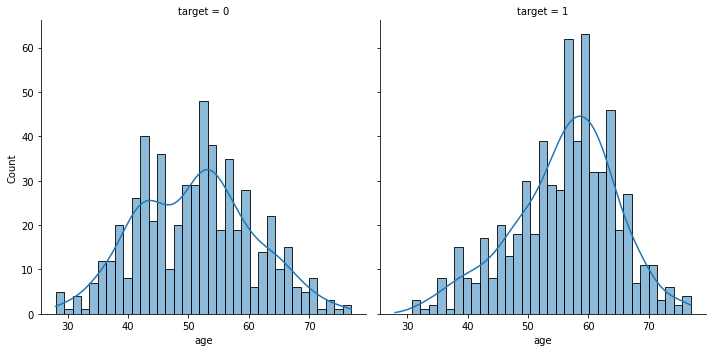

In [17]:
# Getting the distribution of the age values
sns.displot(data=db, x="age", col="target", kde=True, bins=35)

##### So just from looking at the relational plot of age and gender, it is evident that with this dataset, males are more likely to have heart disease as they age compared to their female counterparts.

#### Nonetheless, the general statistics that say individuals around 60 and older have a higher chance of having heart disease holds true for our dataset, as the cases for heart disease seem to spike as the age approaches 60 and interestingly falls as it passes the 60-year mark. I'm curious if at around that age more individuals start to take better care of their health and suffer heart disease less, or if other diseases take them beforehand.

To make the age vairable binary, there are some methods that seem plausable. 
1. Split the age from young--young-adults (0-25), to adults and older (26 - infinity)
2. Split by the median of the dataset

I've opted to go with option two. Although splitting by a recognized age i.e, young-adults to adults, seems good, it can in fact differ for many people. That sort of metric is to subjective to have any mathamathecial advantage. Ultimately leaving me with decision 2, whcih is generally more perffered. The median is generally a better measure of the center when there are extreme values or outliers because it is not affected by the precise numerical values of the outliers.


In [18]:
# SPLITTING THE AGE BY THE MEDIAN

# Setting up vairables
age_median = db['age'].median()
db["age_binary"] = db['age']

# Counting and splitting
db.loc[db["age_binary"] < age_median, "age_binary"] = 0
db.loc[db["age_binary"] == age_median, "age_binary"] = 0
db.loc[db["age_binary"] > age_median, "age_binary"] = 1
        
# Checking results
db["age_binary"].describe()

count    1190.000000
mean        0.492437
std         0.500153
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: age_binary, dtype: float64

In [19]:
db

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,age_binary
0,40,1,2,140,289,0,0,172,0,0.0,1,0,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1,0
2,37,1,2,130,283,0,1,98,0,0.0,1,0,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1,0
4,54,1,3,150,195,0,0,122,0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1,0
1186,68,1,4,144,193,1,0,141,0,3.4,2,1,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1,1


In conclusion, I've discovered that anyone at any age can actually have HD, howver, if a person is young and displays the symptons, or key markers that closely correlate with HD, then their chances are High. For this dataset, the only thing that I've included that is out side the reccomended set of accuracy yeild vairables is blood pressure. This will be a good indicator for determining if the risk for HD should be higher or lower based on the age.

Essentailly what I would be doing is, looking at the age and the blood pressure level, if the individual has a blood pressure level higher than what is approprate then, their chances of having Heart Disease is high.

## Understanding the OLDPEAK vairable 

In [20]:
db['oldpeak'].describe()

count    1190.000000
mean        0.922773
std         1.086337
min        -2.600000
25%         0.000000
50%         0.600000
75%         1.600000
max         6.200000
Name: oldpeak, dtype: float64

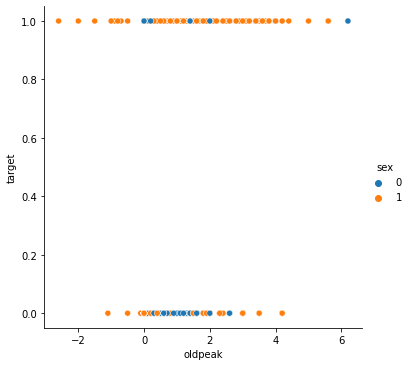

In [21]:
## Looking at the relationship with oldpeak and the target for both male and female
sns.relplot(x='oldpeak', y='target', hue='sex', data=db)

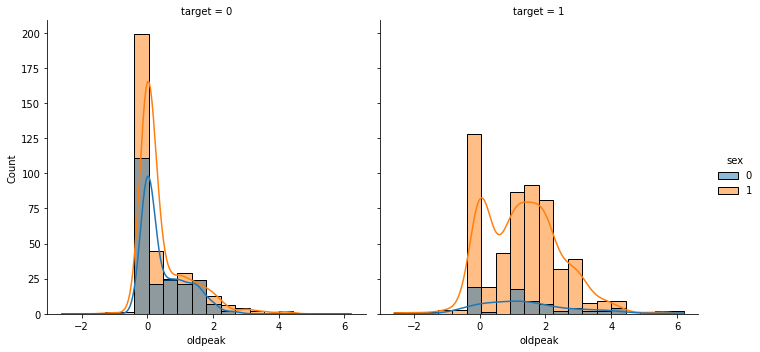

In [22]:
# Getting the distribution of the Oldpeak values
sns.displot(data=db, x="oldpeak", col="target", hue="sex", kde=True, bins=20)

#### From the data, it semse like men with oldpeak greater than ***1*** and less than ***4*** have a high chance of having heart disease. However, it's hard to say the same for women because, it's hard to say if there is a correlation with oldpeak and heart disease for women.

# Building a Model with the Vairabels we have right Now before making the neural Network

## The Model will be a classifier

In [23]:
# Get a count of the number of patients with cardiovascular diseas and without
db['target'].value_counts()

1    629
0    561
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

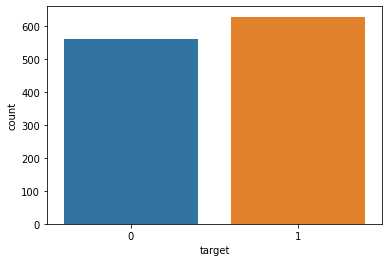

In [24]:
#Visualize the count
sns.countplot(data=db, x=db['target'])

<AxesSubplot:xlabel='age', ylabel='count'>

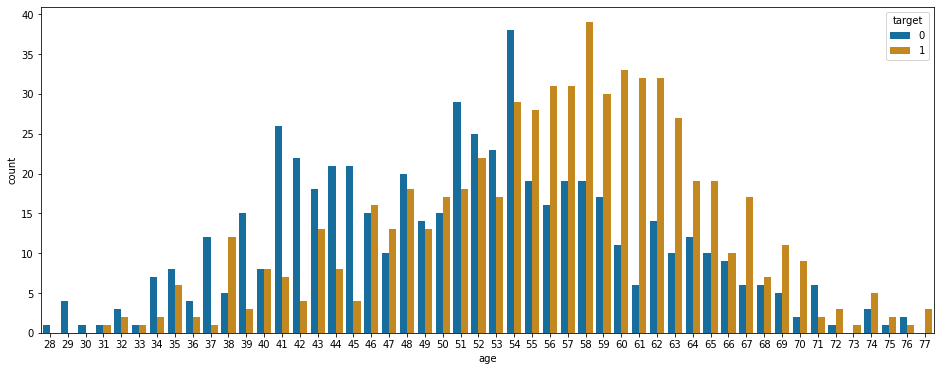

In [25]:
# Looking at how each age is affect by heart disease
plt.figure(figsize=(16, 6))
sns.countplot(data=db, x='age', hue='target', palette='colorblind')

In [26]:
# Get the correlation of the columns
db.corr()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,age_binary
age,1.000000,0.015096,0.149055,0.257692,-0.046472,0.178923,0.194595,-0.368676,0.188095,0.245093,0.237749,0.262029,0.807162
sex,0.015096,1.000000,0.138405,-0.006443,-0.208441,0.110961,-0.022225,-0.181837,0.194380,0.096390,0.127913,0.311267,0.045018
chest pain type,0.149055,0.138405,1.000000,0.009466,-0.109396,0.076492,0.035705,-0.337491,0.403428,0.224106,0.276949,0.460127,0.117910
resting bp s,0.257692,-0.006443,0.009466,1.000000,0.099037,0.088235,0.095860,-0.101357,0.142435,0.176111,0.089384,0.121415,0.229950
cholesterol,-0.046472,-0.208441,-0.109396,0.099037,1.000000,-0.239778,0.150879,0.238028,-0.033261,0.057451,-0.100053,-0.198366,-0.054188
fasting blood sugar,0.178923,0.110961,0.076492,0.088235,-0.239778,1.000000,0.032124,-0.118689,0.053053,0.031193,0.145902,0.216695,0.163767
resting ecg,0.194595,-0.022225,0.035705,0.095860,0.150879,0.032124,1.000000,0.058812,0.037821,0.126023,0.093629,0.073059,0.194721
max heart rate,-0.368676,-0.181837,-0.337491,-0.101357,0.238028,-0.118689,0.058812,1.000000,-0.377691,-0.183688,-0.350750,-0.413278,-0.302303
exercise angina,0.188095,0.194380,0.403428,0.142435,-0.033261,0.053053,0.037821,-0.377691,1.000000,0.370772,0.393408,0.481467,0.186273
oldpeak,0.245093,0.096390,0.224106,0.176111,0.057451,0.031193,0.126023,-0.183688,0.370772,1.000000,0.524639,0.398385,0.236454


<AxesSubplot:>

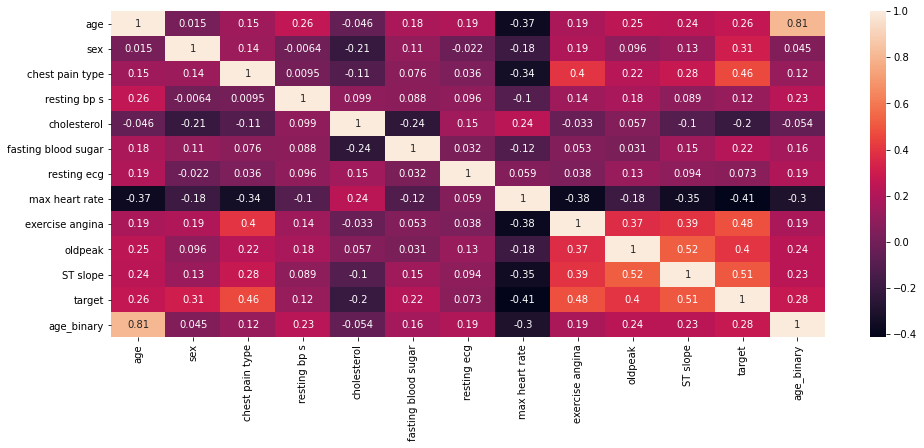

In [27]:
# Visualize Correlation
corelation = db.corr()
plt.figure(figsize=(16, 6))
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

In [74]:
# Prepare Data for classfier
cf_db = db
type(db)

pandas.core.frame.DataFrame

In [75]:
type(cf_db)

pandas.core.frame.DataFrame

In [76]:
cf_db = cf_db.drop(['age_binary','max heart rate','cholesterol'], axis=1)

In [93]:
# Split the data into feature data and target data
X = cf_db.iloc[:, :-1].values
Y =cf_db.iloc[:, -1].values

In [94]:
# Split the data again, into 75% training data set and 25% testing data set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state= 1)

In [95]:
# Feature Scaling, scale the data to have values between 0 and 1
from sklearn.preprocessing import StandardScaler


## Use a ML MODEL

In [96]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, criterion ='entropy', random_state= 1)
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

In [97]:
# Test the models accuracy on the traiing dataset
model = forest
model.score(X_train, Y_train)

0.9910313901345291

In [98]:
# Testing the model accuracy on the test dataset
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, model.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

calculated_accuracy = (TP+TN)/(TP+TN+FN+FP)
# Print Confusion matrix
print(cm)

#Print models accuray on the test data
print("Model Test Accuracy = {}".format(calculated_accuracy))

[[137   6]
 [ 16 139]]
Model Test Accuracy = 0.9261744966442953


### It's intresting that the max heart rate and the cholesterol levels in an indivudial don't really tell much about the likeliehood of having heart disease

In [99]:
X_test

array([[41. ,  1. ,  4. , ...,  0. ,  0. ,  2. ],
       [50. ,  1. ,  4. , ...,  1. ,  0.5,  2. ],
       [62. ,  0. ,  4. , ...,  1. ,  1.7,  3. ],
       ...,
       [44. ,  0. ,  3. , ...,  0. ,  0.3,  2. ],
       [52. ,  1. ,  4. , ...,  1. ,  2. ,  2. ],
       [65. ,  0. ,  3. , ...,  0. ,  0.8,  1. ]])

In [103]:
cf_db.head()

,age,sex,chest pain type,resting bp s,fasting blood sugar,resting ecg,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,0,0,0,0.0,1,0
1,49,0,3,160,0,0,0,1.0,2,1
2,37,1,2,130,0,1,0,0.0,1,0
3,48,0,4,138,0,0,1,1.5,2,1
4,54,1,3,150,0,0,0,0.0,1,0


In [113]:
# Creating a Pickle file using serialization
import pickle
pickle_out = open("classifier_hd.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [112]:
model.predict([[49,0,4,100,0,0,0,1.0,2]])

array([0])